<h1>Содержание проекта по анализу данных<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Когортный-анализ-данных" data-toc-modified-id="Когортный-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Когортный анализ данных</a><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>


# Исследование 

Исходные: 3 фрейма - посещения (visits) заказы (orders) маркетинговые затраты (costs).
Необходимо изучить данные, найти метрики и показатели для рекомендаций.

Цель - определить перспективные источники трафика в разрезе когорт.

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
visits = pd.read_csv('https://www.dropbox.com/s/ojfle9zmirm9xbi/visits_log.csv?dl=1')
orders = pd.read_csv('https://www.dropbox.com/s/6kwq66xm5jdgxo5/orders_log.csv?dl=1')
costs = pd.read_csv('https://www.dropbox.com/s/j4wa83ljuyya5dk/costs.csv?dl=1')     

Изучим данные из файла: выведем первые 10 строк

In [3]:
display(visits.head(10))
display(orders.head(10))
display(costs.head(10))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Оценим типы данных в колумнах а также пропуски в данных:

In [4]:
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

### Вывод

- Пропусков в данных не обнаружено. Типы данных в столбцах с началом сессии и её окончанием, а также столбец, byTs фрейма orders, dt фрейма costs- object. требуется изменение на datetime. 
- Названия столбцов visits и orders необходимо привести к нижнему регистру.

## Предобработка данных

приводим названия столбцов фреймов  к нижнему регистру

In [5]:
#visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
#orders.columns = ['buy_ts', 'revenue', 'uid']

#visits.columns.str.lower()
#orders.columns.str.lower()

visits.rename(columns={'Device': 'device', 'End Ts':'end_ts', 'Source Id':'source_id', 'Uid':'uid', 'Start Ts':'start_ts'}, inplace = True)
orders.rename(columns={'Buy Ts':'buy_ts', 'Revenue':'revenue', 'Uid':'uid'}, inplace = True)

приводим тип данных к типу datetime

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [7]:
#проверяем
#display(visits.info())
#display(orders.info())
#display(costs.info())


данные изменены на соответствующие типы. Profit

### Вывод

Поля в фреймах приведены к типам, которые позволят расчитать необходимые метрики, добавить новые поля.

In [8]:
print('visits max', visits['start_ts'].max())
print('visits min', visits['start_ts'].min())
print('visits max', visits['end_ts'].max())
print('visits min', visits['end_ts'].min())
print('orders max', orders['buy_ts'].max())
print('orders max', orders['buy_ts'].min())

visits max 2018-05-31 23:59:00
visits min 2017-06-01 00:01:00
visits max 2018-06-01 01:26:00
visits min 2017-06-01 00:02:00
orders max 2018-06-01 00:02:00
orders max 2017-06-01 00:10:00


Рассмотрим доступные источники и типы устройств.

In [9]:
display(visits.groupby('device')['device'].value_counts())
display(visits.groupby('source_id')['source_id'].value_counts())

device   device 
desktop  desktop    262567
touch    touch       96833
Name: device, dtype: int64

source_id  source_id
1          1             34121
2          2             47626
3          3             85610
4          4            101794
5          5             66905
6          6                 6
7          7                36
9          9             13277
10         10            10025
Name: source_id, dtype: int64

рассмотрим источники в разрезе девайсов:

In [10]:
visits.groupby('device')['source_id'].value_counts('part')

device   source_id
desktop  4            0.257610
         3            0.250515
         5            0.190690
         2            0.135817
         1            0.098645
         9            0.038539
         10           0.028058
         7            0.000107
         6            0.000019
touch    4            0.352710
         3            0.204817
         5            0.173866
         2            0.123563
         1            0.084888
         9            0.032613
         10           0.027449
         7            0.000083
         6            0.000010
Name: source_id, dtype: float64

Промежуточный вывод: Даты в пределах заявленных диапазонов. Больше всего заходят на ресурс с десктопов. При этом источник трафика в двух случаях одинаков - №4, при этом на десктопах он составляет 25% от всех посещений, на тачпадах он составляет 35%. Остальные источники представлены в таблице выше.

## Расчёты и добавление результатов в таблицу

Расчитаем пользовательские метрики MAU WAU DAU

In [11]:
#для расчёта этих метрик достанем из дат начала сессий месяц, неделю, дату
visits['session_month']  =  visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')

#создадим фреймы метрик, сгруппируем данные по датам, неделям, месяцам - аггрегируем число уникальных uid и находим среднее арифм.
dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby('session_week').agg({'uid':'nunique'}).mean()
mau_total = visits.groupby('session_month').agg({'uid':'nunique'}).mean()

In [12]:
print ('DAU составляет', float(dau_total))
print ('WAU составляет',float(wau_total))
print ('MAU составляет', float(mau_total))

DAU составляет 907.9917582417582
WAU составляет 5724.415094339623
MAU составляет 23228.416666666668


Построим визуализацию динамики этих показателей за год

In [13]:
dau_dynamic = visits.groupby('session_date').agg({'uid':'nunique'}).reset_index()
wau_dynamic = visits.groupby('session_week').agg({'uid':'nunique'}).reset_index()
mau_dynamic = visits.groupby('session_month').agg({'uid':'nunique'}).reset_index()


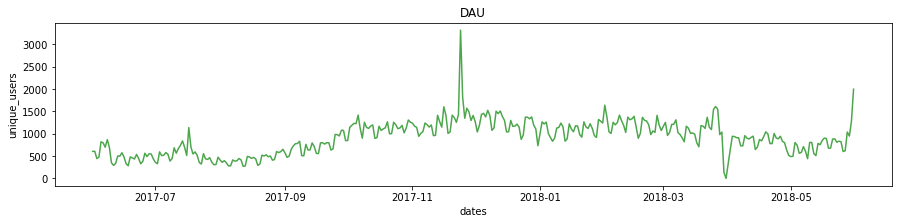

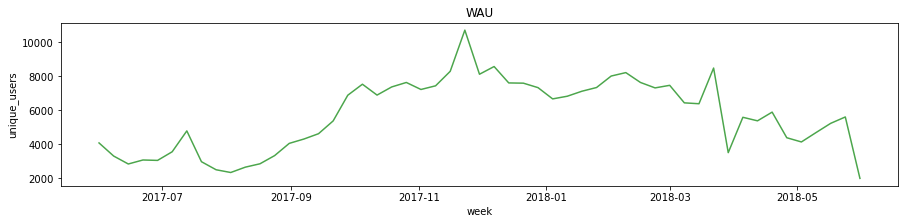

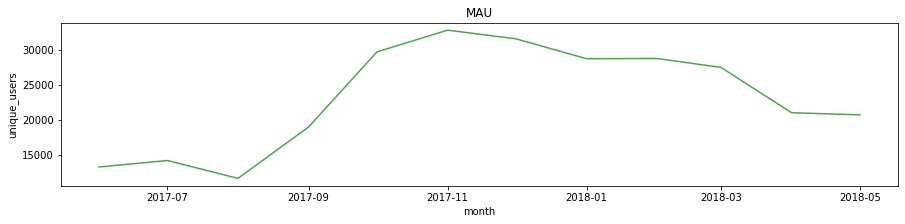

In [14]:
plt.figure(figsize = (15,3)) #динамика DAU по датам
plt.plot(dau_dynamic['session_date'],dau_dynamic['uid'], color = 'green', alpha = 0.7 )
plt.xlabel("dates")    
plt.ylabel("unique_users") 
plt.title('DAU')
plt.show()

plt.figure(figsize = (15,3)) #динамика WAU по датам
plt.plot(wau_dynamic['session_week'],wau_dynamic['uid'], color = 'green', alpha = 0.7 )
plt.xlabel("week")    
plt.ylabel("unique_users") 
plt.title('WAU')
plt.show()

plt.figure(figsize = (15,3)) #динамика MAU по датам
plt.plot(mau_dynamic['session_month'],mau_dynamic['uid'], color = 'green', alpha = 0.7)
plt.xlabel("month")    
plt.ylabel("unique_users") 
plt.title('MAU')
plt.show()

Определим количество ежедневных сессий (посещений) сайта. Для этого сумму дневных визитов сайта отнесём к числу уникальных посетителей.

In [15]:
#сведём таблицу по датам сессий, на предмет уникальных посетителей и количества посещений за дату
visits_mean_per_day = visits.pivot_table(index = 'session_date', values = 'uid', aggfunc = ('count', 'nunique')).reset_index()
visits_mean_per_day.columns =['session_date', 'count_sessions', 'unique_users']
visits_mean_per_day['mean_sessions_per_day'] = visits_mean_per_day['count_sessions'] / visits_mean_per_day['unique_users']
print (visits_mean_per_day)

    session_date  count_sessions  unique_users  mean_sessions_per_day
0     2017-06-01             664           605               1.097521
1     2017-06-02             658           608               1.082237
2     2017-06-03             477           445               1.071910
3     2017-06-04             510           476               1.071429
4     2017-06-05             893           820               1.089024
..           ...             ...           ...                    ...
359   2018-05-27             672           620               1.083871
360   2018-05-28            1156          1039               1.112608
361   2018-05-29            1035           948               1.091772
362   2018-05-30            1410          1289               1.093871
363   2018-05-31            2256          1997               1.129695

[364 rows x 4 columns]


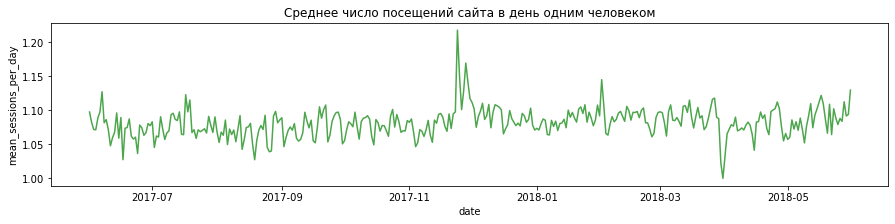

In [16]:
plt.figure(figsize = (15,3)) #динамика среднего числа посещений сайта на 1го пользователя
plt.plot(visits_mean_per_day['session_date'],visits_mean_per_day['mean_sessions_per_day'], color = 'green', alpha = 0.7)
plt.xlabel("date")    
plt.ylabel("mean_sessions_per_day") 
plt.title('Среднее число посещений сайта в день одним человеком')
plt.show()

Определим длительность сессии одного пользователя. Посчитаем разницу между стартом и окончанием сессий.

In [17]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

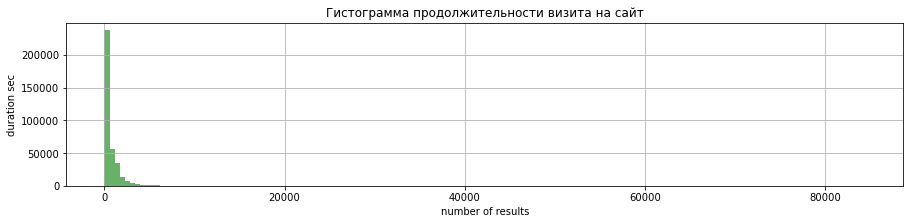

In [18]:
plt.figure(figsize = (15,3))
visits['duration'].hist(bins = 150, color = 'green', alpha = 0.6)
plt.xlabel("number of results")    
plt.ylabel("duration sec") 
plt.title('Гистограмма продолжительности визита на сайт')
plt.show()

Используем моду для определения среднего значения ввиду непоказательности  среднего значения.

In [19]:
visits['duration'].median()

300.0

Основные показатели найдены, данные отображены и готовы к общим выводам и рекомендациям.

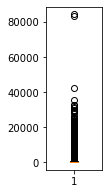

In [20]:
plt.figure(figsize = (1,3))

plt.boxplot(visits['duration'])

plt.show()

In [21]:
visits['duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

### Вывод

## Когортный анализ данных

Создадим таблицу с когортами/
Для этого определим дату первого визита для каждого пользователя

In [22]:
first_date_visit = visits.groupby('uid')['start_ts'].min() #определяем дату первой сессии
first_date_visit.name = 'first_date_visit' #переименовываем столбец
visits  = visits.join(first_date_visit, on  = 'uid' ) #джойним по uid даты первого визита для каждого пользователя


In [23]:
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]') #меняем дату активностей на первое число месяца 
visits['first_activity_month'] = visits['first_date_visit'].astype('datetime64[M]') #меняем дату первичных активностей на первое число месяца 
#print (visits) 

создаём поле с периодами жизни когорт

In [24]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month'] #определяем дельту между первым визитом и датой активности
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M') #трансформируем разницу в lifetime по месяцам
visits['cohort_lifetime'] = visits['cohort_lifetime'].round()
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int') #меняем тип столбца на целочисленный


In [25]:
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index() #группируем визиты по когортам и сроку жизни
#создаём таблицу с когортным анализом количества людей в когортах в определённый период жизни когорт
cohorts.pivot_table(index ='first_activity_month', values = 'uid', columns = 'cohort_lifetime') #динамика активностей по когортам

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


добавим retention rate в таблицу с когортами

In [26]:
initial_uids = cohorts[cohorts['cohort_lifetime'] == 0] #число пришедших в когороту
initial_uids.columns = ['first_activity_month', 'cohort_lifetime', 'initial_uid']

In [27]:
cohorts = cohorts.merge(initial_uids, on = 'first_activity_month') #добавляем число вновь пришедших в когорту для расчёта retention rate



In [28]:
cohorts['retention_rate'] = (cohorts['uid'] / cohorts['initial_uid']) * 100 #создаём столбец и относитм число оставшихся к первоначальному числу посетителей

In [29]:
retention = cohorts.pivot_table(index = 'first_activity_month', columns = 'cohort_lifetime_x', values = 'retention_rate').reset_index()
#сводим retention в таблицу с когортами

In [30]:
retention

cohort_lifetime_x,first_activity_month,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,100.0,7.866355,5.377479,6.139226,6.855721,7.142318,6.101516,5.777208,5.234181,5.083340,4.065163,4.49506
1,2017-07-01,100.0,5.608828,5.129376,5.616438,5.821918,4.817352,4.535769,4.573820,3.881279,2.861492,2.747336,NaN
2,2017-08-01,100.0,7.690797,6.286219,6.276397,5.009331,4.400354,3.634221,3.948532,2.789510,2.602888,NaN,NaN
3,2017-09-01,100.0,8.548851,6.920498,5.070642,3.939176,3.783525,3.585967,2.418582,2.280891,NaN,NaN,NaN
4,2017-10-01,100.0,7.860800,5.223852,3.895754,3.426108,3.222081,2.136505,2.036417,NaN,NaN,NaN,NaN
5,2017-11-01,100.0,7.828097,4.411333,3.868174,3.372725,2.341456,2.179977,NaN,NaN,NaN,NaN,NaN
6,2017-12-01,100.0,5.580180,3.799272,3.110654,2.026278,1.903593,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,100.0,5.971535,3.933876,2.497348,2.024399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-02-01,100.0,5.707979,2.545389,2.009281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-03-01,100.0,4.181845,2.705328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Расчитаем средний retention rate

In [31]:
print ('Средний retention rate на 2й месяц жизни когорт {:.2} % '.format(retention[1].mean()))

Средний retention rate на 2й месяц жизни когорт 6.5 % 


Исследуем среднее время от первого посещения до покупки

In [32]:
visits_unique_id = visits.groupby('uid').agg({'start_ts':'min'}).reset_index() #определяем первый визит
orders_unique_id = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index() #определяем первую покупку

In [33]:
visits_unique_id = visits_unique_id.merge(orders_unique_id, on = 'uid') #совмещаем даты и определяем разницу

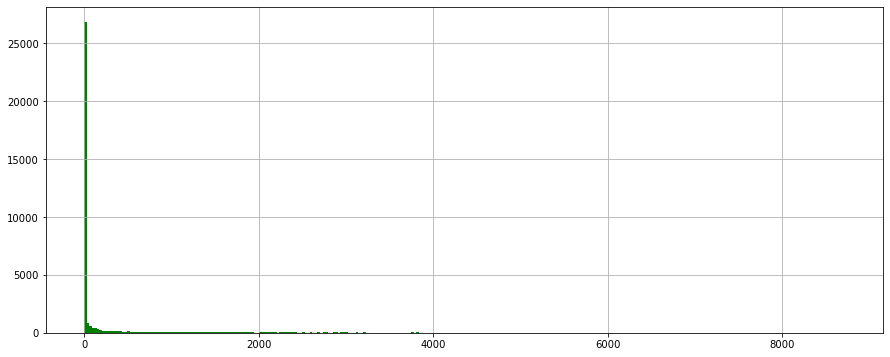

In [34]:
#определяем продолжительность, вводим новый столбец с разницей между временем (первого визита и первой покупки)
visits_unique_id['from_start_to_by_duartion'] = visits_unique_id['buy_ts'] - visits_unique_id['start_ts']

#расчёт будем вести в часах (оптимально для визуализации)
visits_unique_id['from_start_to_by_duartion'] = visits_unique_id['from_start_to_by_duartion'] / np.timedelta64(1,'h')

#приводим в формат вещественных чисел для отражения в гистограмме
visits_unique_id['from_start_to_by_duartion'] = visits_unique_id['from_start_to_by_duartion'].astype('float64')

#рисуем
plt.figure(figsize = (15,6))
visits_unique_id['from_start_to_by_duartion'].hist(bins = 300, color = 'green')
plt.show()

Оценим выбросы для определения лучшего метода поиска среднего времени:

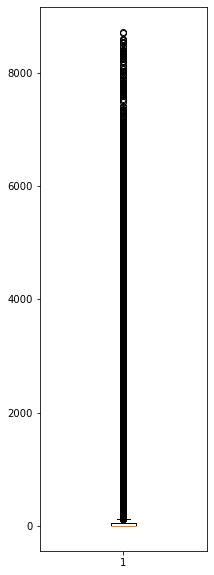

In [35]:
plt.figure(figsize = (3,10))

plt.boxplot(visits_unique_id['from_start_to_by_duartion'])

plt.show()

Преобладающее число выбросов подтверждает необходимость применить моду для обнаружения релевантного значения среднего времени между первой сессией и покупкой. 

In [36]:
print ('__________median__________mean_________________mode__________') #расчитаем все 3 показателя для отображения
print (visits_unique_id['from_start_to_by_duartion'].median(),'|',
        visits_unique_id['from_start_to_by_duartion'].mean(),'|',
         visits_unique_id['from_start_to_by_duartion'].mode())

__________median__________mean_________________mode__________
0.26666666666666666 | 405.66959724012213 | 0    0.016667
dtype: float64


Среди покупателей среднее время(мода), между первым посещением сайта до покупки 0.016667 часа или 1 минута.

Оценим среднее количество покупок за период по когортам

In [37]:
first_buy_date = orders.groupby('uid')['buy_ts'].min() #определяем первую дату покупки
first_buy_date.name = 'first_buy_date' #переименовываем столбец

orders = orders.join(first_buy_date, on = 'uid') #джойним столбец для обозначения когорт




In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   buy_ts          50415 non-null  datetime64[ns]
 1   revenue         50415 non-null  float64       
 2   uid             50415 non-null  uint64        
 3   first_buy_date  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


In [39]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]') #меняем дату покупки на первое число месяца 
orders['first_buy_month'] = orders['first_buy_date'].astype('datetime64[M]')
orders['cohort_lifetime'] = orders['buy_month'] - orders['first_buy_month'] #определяем дельту между первой покупкой и датой текущей покупки
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M') #трансформируем разницу в lifetime по месяцам
orders['cohort_lifetime'] = orders['cohort_lifetime'].round()
orders['cohort_lifetime'] = orders['cohort_lifetime'].astype('int') #меняем тип столбца на целочисленный

n_buyers = orders.groupby('first_buy_month').agg({'uid':'nunique'}) #определяем число уникальных покупателей в когорте всего
n_buyers.columns = ['unique_users_cohort']
#группируем по когорте и периоду жизни, считаем число уникальных покупателей и всего покупок
orders_cohorts = orders.groupby(['first_buy_month', 'cohort_lifetime']).agg(unique_users = pd.NamedAgg(column = 'uid', aggfunc = 'nunique'), count_buy = pd.NamedAgg(column = 'uid', aggfunc = 'count')).reset_index()

orders_cohorts = orders_cohorts.merge(n_buyers, on = 'first_buy_month')
orders_cohorts.columns = ['first_buy_month', 'cohort_lifetime', 'unique_users', 'count_buy', 'unique_users_cohort']
#сводим информацию в единую таблицу: находим отношение числа покупок к числу уникальных пользователей.
orders_cohorts['mean_transactions_per_user'] = orders_cohorts['count_buy'] / orders_cohorts['unique_users_cohort']

#сводим данные в таблицу с когортами и жизненным периодом 
orders_cohorts.pivot_table(index ='first_buy_month', values = 'mean_transactions_per_user', columns = 'cohort_lifetime') #динамика активностей по когортам



cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,1.163618,0.087494,0.086011,0.111715,0.144340,0.107761,0.136431,0.086011,0.104795,0.075630,0.047454,0.042511
2017-07-01,1.136765,0.052002,0.062402,0.054082,0.037441,0.042642,0.031721,0.026001,0.030161,0.012480,0.027561,NaN
2017-08-01,1.118978,0.078832,0.072993,0.059124,0.062044,0.045255,0.035766,0.056934,0.033577,0.033577,NaN,NaN
2017-09-01,1.136381,0.084851,0.062379,0.063541,0.025959,0.042232,0.041844,0.021697,0.023634,NaN,NaN,NaN
2017-10-01,1.143779,0.072350,0.037327,0.028111,0.029724,0.023733,0.019816,0.028802,NaN,NaN,NaN,NaN
2017-11-01,1.179368,0.097280,0.044597,0.051703,0.033325,0.014457,0.024994,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,0.061602,0.046087,0.040840,0.019621,0.023956,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,0.066410,0.047139,0.018974,0.023125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,0.060805,0.022733,0.019173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитаем средний чек по месяцам. Для этого добавим столбец фрейма orders с месяцем покупки.

In [40]:
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
display(orders['month'])

0       2017-06-01
1       2017-06-01
2       2017-06-01
3       2017-06-01
4       2017-06-01
           ...    
50410   2018-05-01
50411   2018-05-01
50412   2018-05-01
50413   2018-05-01
50414   2018-06-01
Name: month, Length: 50415, dtype: datetime64[ns]

In [41]:
orders

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,0,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,0,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,0,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,0,2018-05-01


Определим средний чек. Сведём в в таблицу месяц покупки как индекс, и число ордеров с суммой сделок для расчёта средней.

In [42]:
#рассчитаем число суммы покупок за месяц и количество таких покупок 
mean_revenue = orders.pivot_table(index = 'month', values = 'revenue',  aggfunc = ('sum','count')).reset_index()
#создадим новое поле со средним доходом
mean_revenue['mean_revenue'] = mean_revenue['sum'] / mean_revenue['count'] #находим отношение суммы кэш к числу сделок
mean_revenue 
mean_revenue = mean_revenue.drop(index=[12]) #дропаем последний месяц (как непоказательный)


Визуализируем динамику среднего чека по месяцам

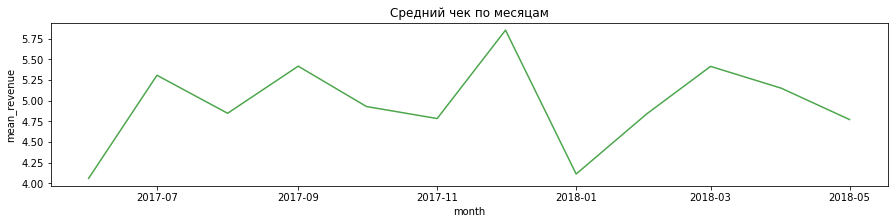

In [43]:
plt.figure(figsize = (15,3)) #график среднего чека по месяцам
plt.plot(mean_revenue['month'],mean_revenue['mean_revenue'], color = 'green', alpha = 0.7)
plt.xlabel("month")    
plt.ylabel("mean_revenue") 
plt.title('Средний чек по месяцам')
plt.show()


Рассчитаем средний LTV по месяцам

In [44]:
orders.columns = ['buy_ts', 'revenue', 'uid', 'first_buy_date', 'buy_month',
       'first_buy_month', 'cohort_lifetime', 'month'] #переименовываю для удобства

In [45]:
#определяем размер когорт (уникальные пользователи по месяцу первой покупки)
buyer_cohorts_size = orders.groupby('first_buy_month').agg({'uid':'nunique'}).reset_index() 
#переименовываем столбцы
buyer_cohorts_size.columns=['first_buy_month', 'n_buyers']

In [46]:
#сгруппируем фрейм с покупками (суммы выручки) по первому месяцу, месяцу покупки
cohorts_buyers = orders.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index() #определяем сумму сделок по когортам и месяцу жизни 
cohorts_buyers

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [47]:
#сцепляем таблицы с доходами и размером когорт

cohorts_buyers = cohorts_buyers.merge(buyer_cohorts_size, on = 'first_buy_month')


In [48]:
#создаём столбец для сводной таблицы с периодом жизни когорты
cohorts_buyers['life'] = (cohorts_buyers['buy_month'] - cohorts_buyers['first_buy_month']) / np.timedelta64(1,'M')
#округляем и меняем тип на целочисленный
cohorts_buyers['life'] = cohorts_buyers['life'].round().astype('int64')

In [49]:
#находим средние приросты ltv в зависимости от когорты и периода жизни
cohorts_buyers['ltv'] = cohorts_buyers['revenue'] / cohorts_buyers['n_buyers']

In [50]:
ltv_by_cohorts = cohorts_buyers.pivot_table(index = 'first_buy_month', columns = 'life', values = 'ltv', aggfunc = 'mean')

In [51]:
ltv_by_cohorts = ltv_by_cohorts.cumsum(axis=1).round(2) 
ltv_by_cohorts


life,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


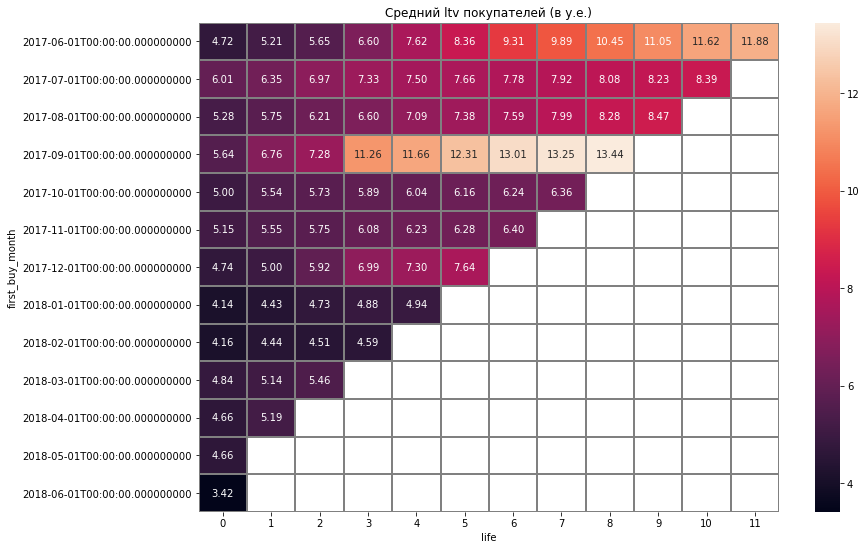

In [52]:
#для наглядности визуализируем:
plt.figure(figsize=(13, 9))
plt.title('Средний ltv покупателей (в у.е.)')
sns.heatmap(ltv_by_cohorts, annot=True, fmt='.2f', linewidths=1, linecolor='gray', color = 'green')
plt.show()

Рассчитаем ltv за 6 месяцев по когортам, прожившим не менее 6 периодов. Для этого ограничим в отчётном фрейме, самую младшую когорту 1м декабря 2017 года. ***Видим аномалию когорты от октября 2017 на 4й период.***

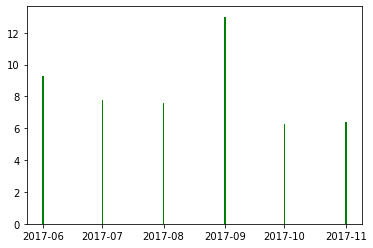

In [53]:
#ограничиваем исходный фрейм когортами не младше декабря 2017 года, cтрахуемся временем жизни когорт

cohorts_buyers_6_month_6_life = pd.DataFrame(ltv_by_cohorts[6])
cohorts_buyers_6_month_6_life = cohorts_buyers_6_month_6_life.reset_index()
cohorts_buyers_6_month_6_life
#рисуем график для наглядности изменения среднего (полугодового ltv)
plt.bar(cohorts_buyers_6_month_6_life['first_buy_month'], cohorts_buyers_6_month_6_life[6], color = 'green')

plt.show()


На графике средних значений по ltv за полгода также видим подтверждение аномалии, найденной на тепловой карте приростов ltv. Исследуем расходы на маркетинг, для определения причин такого стремительного локального роста. В первую очередь посчитаем затраты на маркетинг в целом за весь период.

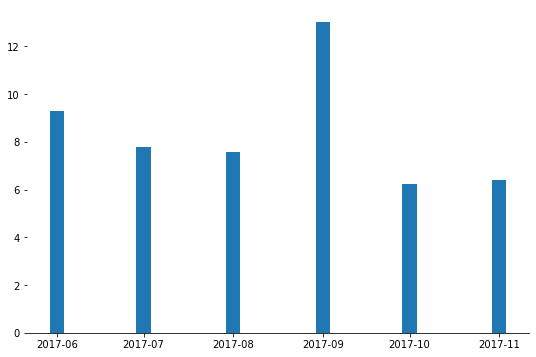

In [54]:
tmp = cohorts_buyers_6_month_6_life.dropna()
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(x=tmp['first_buy_month'], height=tmp[6], width=5)
sns.despine(left=True)

<hr style="border: 2px solid orange;" />

In [55]:
print('Всего затрат на маркетинг', costs['costs'].sum())

Всего затрат на маркетинг 329131.62


Найдём затраты на маркетинг по источникам трафика

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


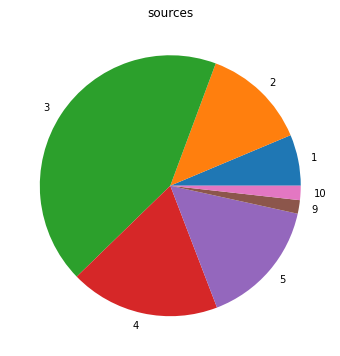

In [56]:

print (costs.groupby('source_id')['costs'].sum())
#визуализируем для наглядности
plt.figure(figsize=(6,6))
plt.pie(costs.groupby('source_id')['costs'].sum(), labels = costs.groupby('source_id')['costs'].sum().reset_index()['source_id'])
plt.title('sources')
plt.show()

In [57]:
costs['month'] = costs['dt'].astype('datetime64[M]') #приведём месяц кампании в формат месяца

In [58]:
#для анализа динамиики трат по месяцам, сгруппируем фрейм costs по источникам и месяцу, аггрегируем в сумму затрат в группировке
display(costs)
grouped_costs = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [59]:
grouped_costs['source_id'].value_counts() #проверяем группировку

1     12
2     12
3     12
4     12
5     12
9     12
10    12
Name: source_id, dtype: int64

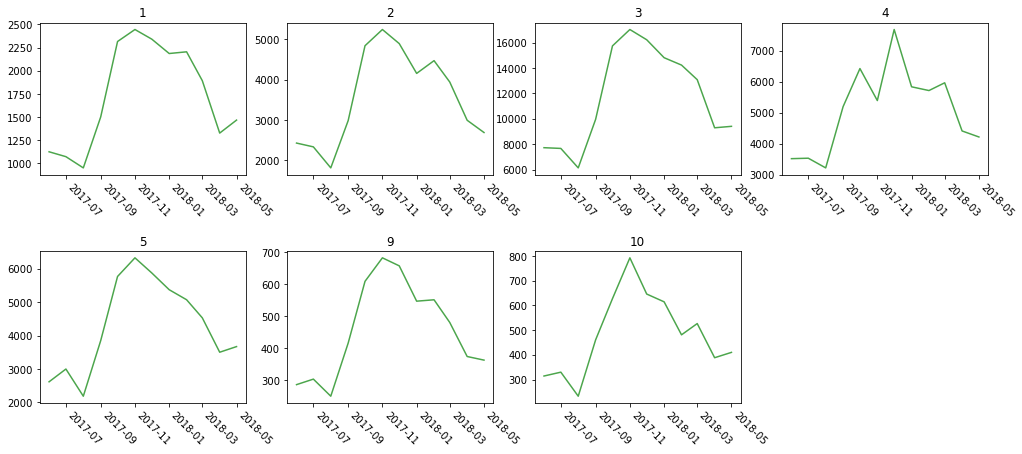

In [60]:
#в цикле нарисуем годовую динамику всех источников
list_source = [1,2,3,4,5,9,10]
i = 1 

plt.figure(figsize=(17,7))



plt.subplots_adjust(wspace=0.2, hspace=0.5)
i=1

for source in list_source:
    costs_source = grouped_costs[grouped_costs['source_id'] == source]
    plt.subplot(2, 4, i)
    plt.plot(costs_source['month'], costs_source['costs'], color = 'green', alpha = 0.7)
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.title(source)
    plt.show
    i += 1
    
  

Рассчитаем САС. Найдём уникальное число покупателей.

In [61]:
#сгруппируем фрейм по месяцам, в месяцах найдём число покупателей
unique_month_buyers = orders.groupby('month').agg({'uid':'nunique'}).reset_index()
unique_month_buyers = pd.DataFrame(unique_month_buyers)

In [62]:
n_buyers.reset_index()
n_buyers = pd.DataFrame(n_buyers).reset_index()


Расчитаем средний CAC для покупателя и для всего проекта. Поделим общие расходы на число уникальных покупателей.

In [63]:
print ('CAC для всего проекта составляет', costs.costs.sum())
print ('CAC для одного пользователя проекта составляет', costs.costs.sum() / orders.uid.nunique())


CAC для всего проекта составляет 329131.62
CAC для одного пользователя проекта составляет 9.011626098622786


Разобъём средний CAC по месяцам.

In [64]:
source_cac = costs.groupby('month')['costs'].sum() / orders.groupby('month')['uid'].nunique()  #сумма расходов делённая на кол-во уникальных посетителей
source_cac = pd.DataFrame(source_cac).reset_index()


In [65]:
source_cac.columns = ['month', 'cac_mean']
display(source_cac)

,month,cac_mean
0,2017-06-01,8.905091
1,2017-07-01,9.193846
2,2017-08-01,10.047921
3,2017-09-01,8.861422
4,2017-10-01,7.769600
5,2017-11-01,8.336899
6,2017-12-01,7.753005
7,2018-01-01,8.598902
8,2018-02-01,7.685070
9,2018-03-01,7.274640


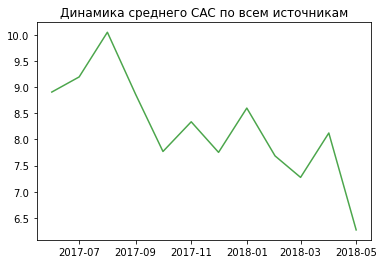

In [66]:
#визуализируем динамику CAC
plt.plot(source_cac['month'],source_cac['cac_mean'], color = 'green', alpha = 0.7)
plt.title('Динамика среднего CAC по всем источникам')
plt.show()

In [67]:
#найдём САС в разбивке по источникам и месяцу
costs_month_source_id = costs.groupby(['source_id','month'])['costs'].sum()
costs_month_source_id = pd.DataFrame(costs_month_source_id)
costs_month_source_id

costs
source_id month              
1         2017-06-01  1125.61
          2017-07-01  1072.88
          2017-08-01   951.81
          2017-09-01  1502.01
          2017-10-01  2315.75
...                       ...
10        2018-01-01   614.35
          2018-02-01   480.88
          2018-03-01   526.41
          2018-04-01   388.25
          2018-05-01   409.86

[84 rows x 1 columns]

***РАЗДЕЛ: ПОИСК САС. Определим главный источник для каждого клиента и мерджим это поле в покупки (orders)***

Определим главный источник для каждого покупателя.

In [68]:
first_source = visits.query('start_ts == first_date_visit') #делаем срез orders, где время покупки равно времени первой покупки

In [69]:
first_source.columns = ['device', 'end_ts', 'first_source_id', 'start_ts', 'uid', 'session_month',
       'session_week', 'session_date', 'duration', 'first_date_visit',
       'activity_month', 'first_activity_month', 'cohort_lifetime'] #меняем имя столбца с ресурсом на 'first_source_id'

In [70]:
#мерджим источник первого визита к фрейму с покупками
orders_plus_sources = orders.merge(first_source[['uid','first_source_id']], on = 'uid')
orders_plus_sources = orders_plus_sources.reset_index()


In [71]:
#сумма затрат ресурсов на маркетинг помесячно
costs_month_source_id = costs_month_source_id.reset_index()
costs_month_source_id 

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [72]:
#сделаем фрейм с числом людей-покупателей по месяцам и источникам
n_buyers_month = orders_plus_sources.groupby(['month','first_source_id']).agg({'uid':'nunique'}).reset_index()


In [73]:
#мерджим количество людей к фрейму costs

costs_month_source_id

costs_month_source_id = costs_month_source_id.merge(n_buyers_month, left_on = ['month','source_id'], right_on = ['month','first_source_id'])

найдём удельный САС как отношение инвестиций и количества людей

In [74]:

costs_month_source_id['cac'] = costs_month_source_id['costs'] / costs_month_source_id['uid']
costs_month_source_id = costs_month_source_id[costs_month_source_id['uid'] > 1]

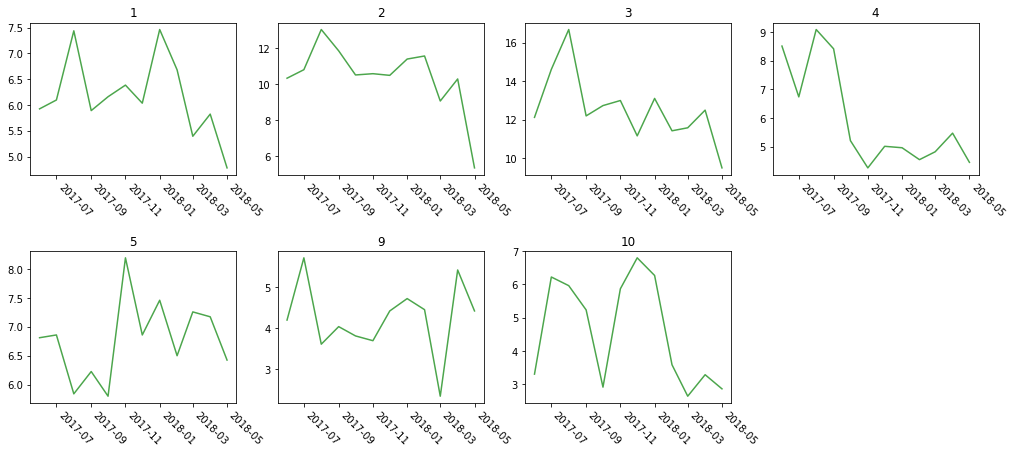

In [75]:
costs_month_source_id

plt.figure(figsize=(17,7))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
j=1

#визуализируем удельный cac по источникам 

for source in list_source:
    cac_source = costs_month_source_id[costs_month_source_id['first_source_id'] == source]
    plt.subplot(2, 4, j)
    plt.plot(cac_source['month'], cac_source['cac'], color = 'green', alpha = 0.7)
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.title(source)
    plt.show
    j += 1

In [76]:
#построим сводную таблицу: отношение величин Сас по источникам и месяцам 
costs_month_source_id.pivot_table(index = 'source_id', columns = 'month', values = 'cac')

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,5.924263,6.095909,7.436016,5.890235,6.158910,6.384230,6.034021,7.461365,6.680242,5.393419,5.822325,4.780489
2,10.329277,10.801435,13.029137,11.847857,10.509761,10.580000,10.487794,11.391068,11.561602,9.064690,10.287629,5.357450
3,12.118574,14.617848,16.694402,12.195288,12.732395,12.996443,11.155103,13.105115,11.419390,11.575973,12.495712,9.487319
4,8.510412,6.736126,9.088588,8.415332,5.207494,4.256572,5.010091,4.959855,4.544121,4.819620,5.469591,4.450063
5,6.812813,6.860732,5.842995,6.228382,5.802213,8.193446,6.860421,7.460444,6.501679,7.259006,7.174488,6.426550
9,4.194412,5.708302,3.607681,4.035146,3.808813,3.692865,4.415973,4.716897,4.447581,2.342878,5.412899,4.416707
10,3.307579,6.223019,5.963333,5.234886,2.917395,5.869333,6.798526,6.268878,3.588657,2.645276,3.290254,2.866154


Найдём ROMI по когортам. Определим главные источники по каждому пользователю. По предложению из условия примем за главный источник - источник первого визита. Для этого сделаем срез по фрейму "первые визиты". По условию дата визита, приравненная к дате первого визита.

Для поиска ROMI необходимо найти отношение LTV / CAC. Чтобы найти эти показатели по когортам и источникам, необходима группировка данных. В таблице orders отсутствуют показатели источника покупки. Примем за такой источник - источник первого контакта покупателя

Создадим фрейм с подсчётом LTV по когортам и времени жизни

In [77]:
cohorts_source_orders = orders_plus_sources.groupby(['first_buy_month','cohort_lifetime','first_source_id','month']).agg({'revenue':'sum'}).reset_index()
cohorts_source_orders.columns = ['first_buy_month', 'cohort_lifetime', 'first_source_id','month', 'revenue_sum']

Сгруппируем фрейм costs для расчёта CAC

In [78]:
costs_grouped = costs.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()

costs_grouped.columns = ['first_source_id', 'month', 'costs']


сгруппируем orders для расчёта числа покупателей по когорте, времени жизни когорты и источнику. Приведём все фреймы для посчёта LTV CAC ROMI

In [79]:
orders_month_source_counts = orders_plus_sources.groupby(['first_buy_month','cohort_lifetime','first_source_id']).agg({'uid':'nunique'}).reset_index()

In [80]:
orders_month_source_counts.columns = ['first_buy_month', 'cohort_lifetime', 'first_source_id', 'count_uid']

In [81]:
cohorts_ltv_cac = cohorts_source_orders.merge(orders_month_source_counts, on = ['first_buy_month','first_source_id'])

In [82]:
cohorts_ltv_cac = cohorts_ltv_cac.merge(costs_grouped, on = ['first_source_id'])

In [83]:
cohorts_ltv_cac['ltv'] = cohorts_ltv_cac['revenue_sum'] / cohorts_ltv_cac['count_uid']
cohorts_ltv_cac['cac'] = cohorts_ltv_cac['costs'] / cohorts_ltv_cac['count_uid']
cohorts_ltv_cac['romi'] = cohorts_ltv_cac['ltv'] / cohorts_ltv_cac['cac']

In [84]:
cohorts_ltv_cac

,first_buy_month,cohort_lifetime_x,first_source_id,month_x,revenue_sum,cohort_lifetime_y,count_uid,month_y,costs,ltv,cac,romi
0,2017-06-01,0,1,2017-06-01,1378.70,0,190,2017-06-01,1125.61,7.256316,5.924263,1.224847
1,2017-06-01,0,1,2017-06-01,1378.70,0,190,2017-07-01,1072.88,7.256316,5.646737,1.285046
2,2017-06-01,0,1,2017-06-01,1378.70,0,190,2017-08-01,951.81,7.256316,5.009526,1.448503
3,2017-06-01,0,1,2017-06-01,1378.70,0,190,2017-09-01,1502.01,7.256316,7.905316,0.917903
4,2017-06-01,0,1,2017-06-01,1378.70,0,190,2017-10-01,2315.75,7.256316,12.188158,0.595358
...,...,...,...,...,...,...,...,...,...,...,...,...
49447,2018-05-01,0,10,2018-05-01,470.89,0,130,2018-01-01,614.35,3.622231,4.725769,0.766485
49448,2018-05-01,0,10,2018-05-01,470.89,0,130,2018-02-01,480.88,3.622231,3.699077,0.979226
49449,2018-05-01,0,10,2018-05-01,470.89,0,130,2018-03-01,526.41,3.622231,4.049308,0.894531
49450,2018-05-01,0,10,2018-05-01,470.89,0,130,2018-04-01,388.25,3.622231,2.986538,1.212853


Объединим фреймы с ордерами и расходами на маркетинг

In [85]:
romi_count_cohorts = cohorts_ltv_cac.pivot_table(index = ['first_source_id','first_buy_month'], columns = 'cohort_lifetime_x', values = 'romi')

Рассмотрим визуализации

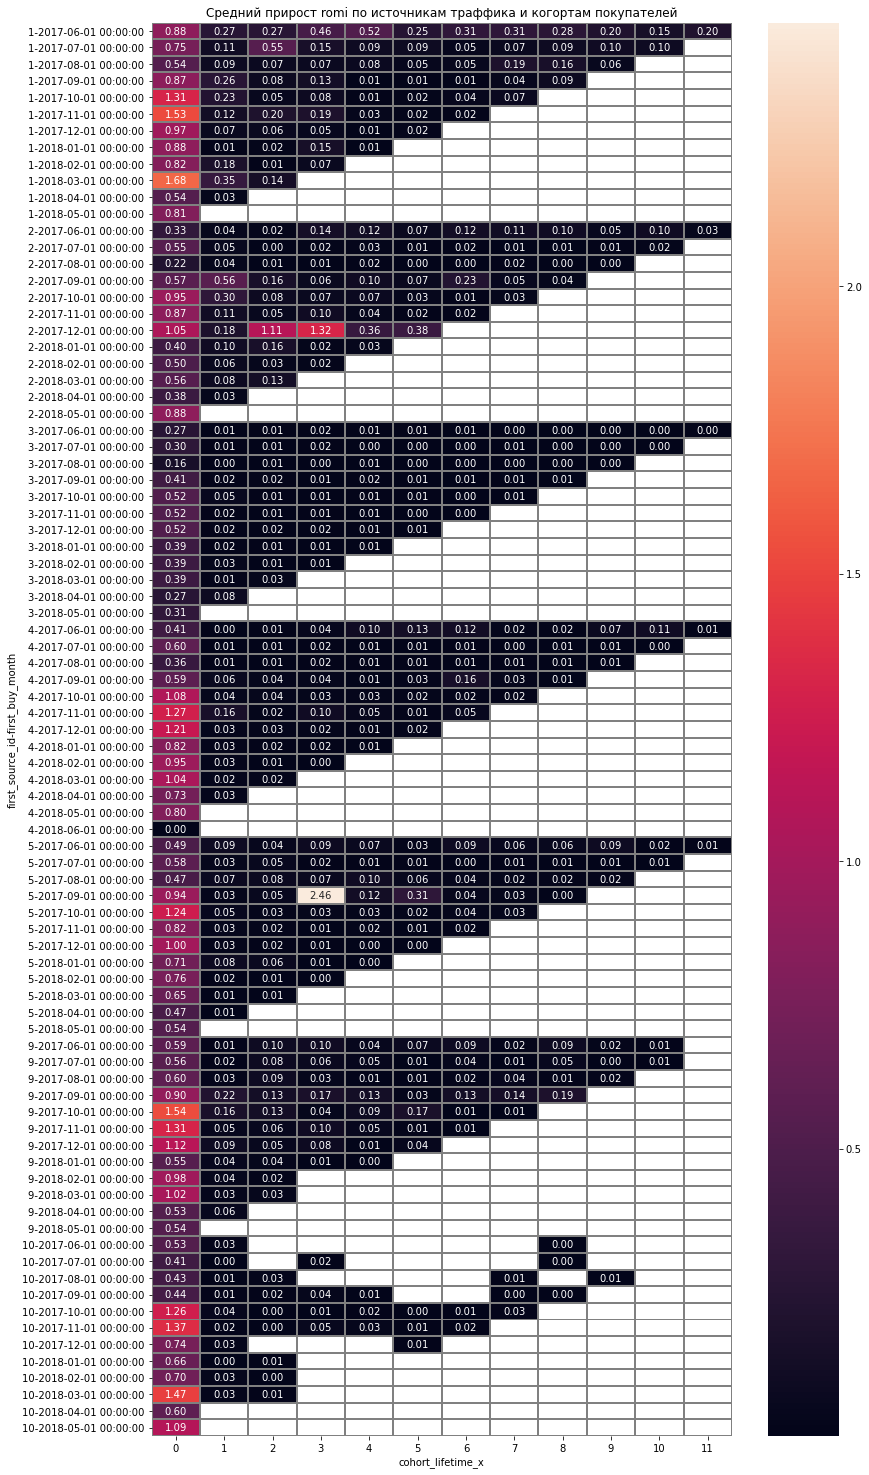

In [86]:
romi_count_cohorts

plt.figure(figsize=(13, 26))
plt.title('Средний прирост romi по источникам траффика и когортам покупателей')
sns.heatmap(romi_count_cohorts, annot=True, fmt='.2f', linewidths=1, linecolor='gray', color = 'green') 
plt.show()

посчитаем romi кумуляту для определения срока окупаемости по источникам и когортам

In [87]:
romi_count_cohorts = romi_count_cohorts.cumsum(axis=1).round(2) 

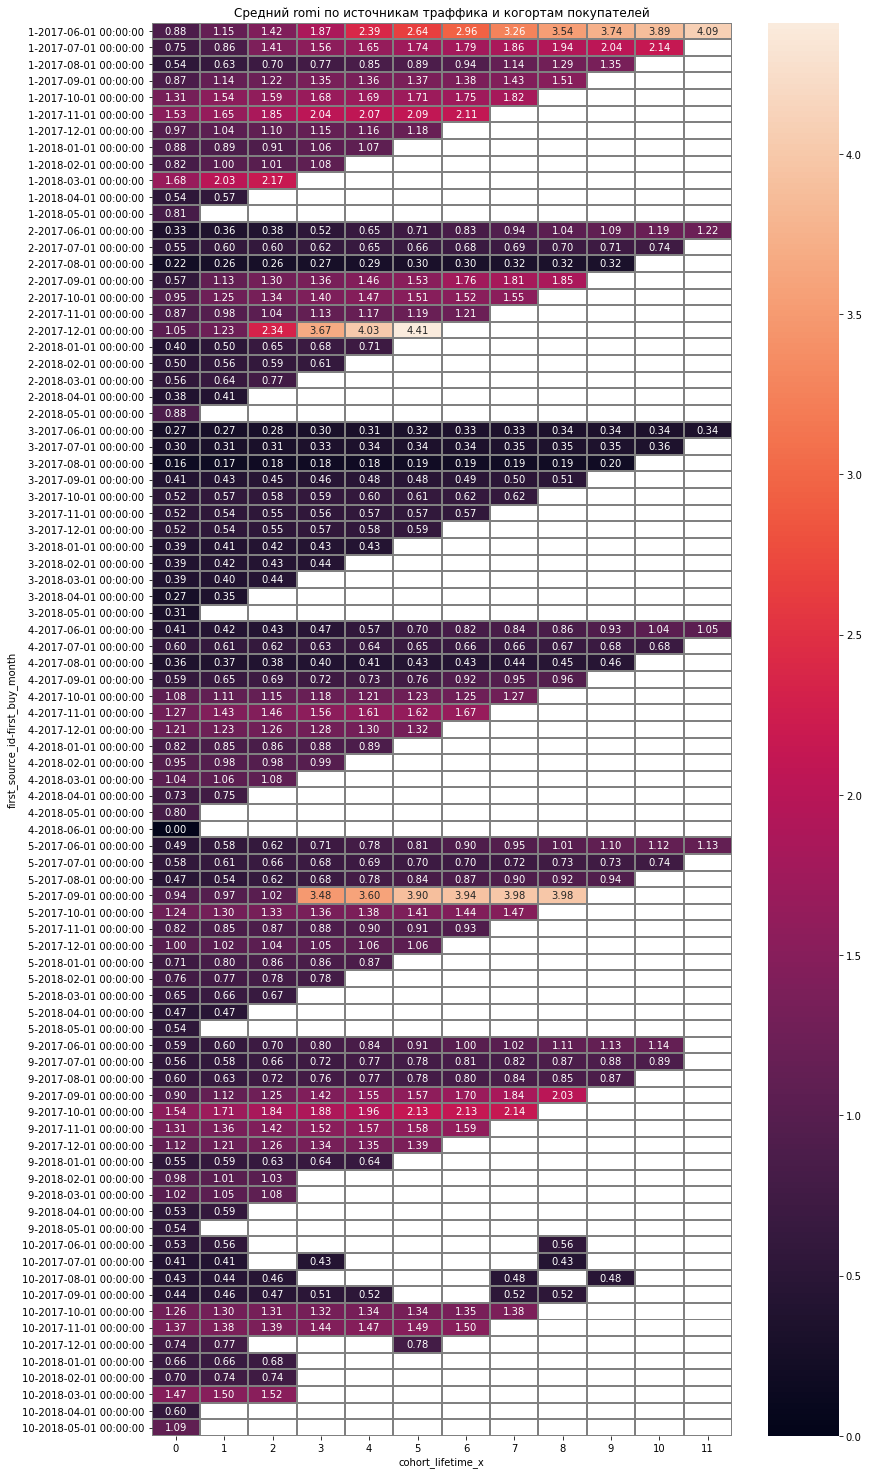

In [88]:
plt.figure(figsize=(13, 26))
plt.title('Средний romi по источникам траффика и когортам покупателей')
sns.heatmap(romi_count_cohorts, annot=True, fmt='.2f', linewidths=1, linecolor='gray', color = 'green') 
plt.show()

Для отдельного наглядного анализа перспективных когорт, сгруппируем в romi по когортам, игнорируя источники

In [89]:
romi_count_cohorts = cohorts_ltv_cac.pivot_table(index = ['first_buy_month'], columns = 'cohort_lifetime_x', values = 'romi')
romi_count_cohorts = romi_count_cohorts.cumsum(axis=1).round(2) 

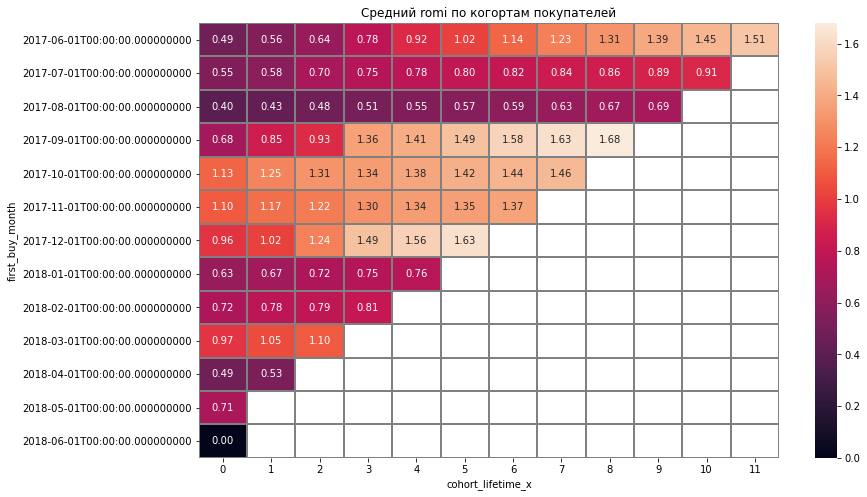

In [90]:
plt.figure(figsize=(13, 8))
plt.title('Средний romi по когортам покупателей')
sns.heatmap(romi_count_cohorts, annot=True, fmt='.2f', linewidths=1, linecolor='gray', color = 'green') 
plt.show()

## Общий вывод

- Исходя из полученных результатов когортного анализа и анализа результатов маркетинговых мероприятий по источникам выделется источник "1". В первом источнике наблюдаются отличные показатели накопленного romi по всем когортам. Что касается источников 2, 4, 5, 9, 10 - их romi находится на приемлемом уровне в только в когорте октября 2017 года, начиная с 1го месяца. Остальные источники и периоды в меньшей показывают эффективность маркетинговых инвестиций. Самые эффективные 

- ***5й истоник трафика показывает предположительную причину аномалии резкого роста ltv 3го периода когорты от 2017 сентября к кампаниям этой когорты на 3й период стоит присмотреться для дополнительных инвестиций***
- продуктовые метрики (MAU WAU DAU) показали полугодовой рост (до нового года) и монотонное снижение показателей далее;
- среднее число посещений сайта циклично (связано с днями недели), имеет очевидный пик в декабре 2017 и провал в апреле 2018.

- retention показывает лучшие результаты в июньской и июльской когортах 2017 года
- средний чек показывает стремительный рост в декабре 2017 и провал в январе 2018 года
- Исходя из полученных результатов когортного анализа и анализа результатов маркетинговых мероприятий по источникам выделется источник "1". В первом источнике наблюдаются отличные показатели накопленного romi по всем когортам. Что касается источников 2, 4, 5, 9, 10 - их romi находится на приемлемом уровне в только в когорте октября 2017 года, начиная с 1го месяца. Остальные источники и периоды в меньшей показывают эффективность маркетинговых инвестиций. 
- без разбивки по источникам, наиболее перспективные когорты по индексу  romi это 2017.10, 2017.12, 2018.03 - предположительно спрос ближе к чёрной пятнице, новый год, первые весенние праздники: оккупаемость этих когорт наступает практически в первый месяц. В течение 10 месяцев медленно окупается  когорта  2017.10.
